<a href="https://colab.research.google.com/github/meriemdouider1/mois1-mois2/blob/main/modelisation%20app/RFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
Cl = '/content/AXEAPP.xlsx' 
apprentissage= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
apprentissage

,Cs_longia,AXE11,AXE12,AXE2,AXE3,AXE4,AXE5
0,1,0.001424,0.031177,-0.059472,-3.681616,-2.401045,-0.173420
1,1,0.001859,0.007034,-0.032365,-0.780750,-0.885475,-0.161534
2,1,0.001859,0.007034,-0.032365,-0.780750,-0.885475,-0.161534
3,0,-0.001565,0.007444,0.052511,-0.575102,-0.089102,-0.036805
4,0,-0.001238,0.010596,0.047796,-1.674400,0.216223,0.038151
...,...,...,...,...,...,...,...
198,1,0.002694,-0.011021,-0.107134,-1.678789,-0.626739,-0.093039
199,1,0.001341,-0.016060,-0.078564,-1.584375,0.421137,-0.297170
200,1,0.001998,-0.013530,-0.123163,-1.309588,-0.722200,-0.279362
201,1,-0.000923,-0.014214,0.010676,-1.404706,1.443951,0.121188


In [4]:
Cl2 = '/content/AXETEST.xlsx' 
test= pd.read_excel(Cl2, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [5]:
test

,Cs_longia,AXE11,AXE12,AXE2,AXE3,AXE4,AXE5
0,0,-0.001640,0.011923,0.102308,-1.801407,-0.832450,0.062173
1,1,-0.005890,0.007865,0.008081,-1.369971,-0.792410,-0.012560
2,1,-0.005890,0.007865,0.008081,-1.369971,-0.792410,-0.012560
3,1,0.000629,0.013577,-0.077555,-2.480820,-0.756910,-0.121500
4,0,-0.002810,0.005402,0.016373,-0.059747,0.577835,0.278006
5,0,-0.002760,0.005402,0.021959,-0.262708,0.577835,0.273379
6,0,-0.000010,0.006071,0.030925,0.381259,-0.687890,-0.080940
7,0,0.001179,0.004634,-0.022492,0.806717,-0.719120,0.224582
8,1,-0.002400,0.006000,0.109514,0.845323,1.029173,0.228331
9,0,-0.001750,0.005932,0.090288,0.493467,1.097954,0.133737


In [6]:
X_app = apprentissage.loc[:, apprentissage.columns != 'Cs_longia']
Y_app = apprentissage.Cs_longia
X_test = test.loc[:, test.columns != 'Cs_longia']
Y_test = test.Cs_longia

In [7]:
###Recall
def recall(y_test, preds):
  recall=recall_score(y_test, preds)
  return recall
def MCC(y_test, preds):
  MCC= matthews_corrcoef(y_test, preds) 
  return MCC
### MCC
def MCC(y_test, preds):
  MCC= matthews_corrcoef(y_test, preds) 
  return MCC
### sensibilite
def sensibilite(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  sensibilite =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[1,0])
  return sensibilite
### specifite 
def specifite(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  specifite =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[0,1])
  return specifite 
### kappa
def kappa(y_test, preds):
  value = cohen_kappa_score(y_test, preds)
  return value
### balancedacc
def balancedacc(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  sen = (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  spe = (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  value = (sen + spe)/2
  return value
def présicion_positive(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  pre_pos =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  return pre_pos
def présicion_négative(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  pre_pos =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  return pre_pos
  
### courbe roc
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

# Xgboost

In [191]:
Classifier1 = XGBClassifier(scale_pos_weight=1,learning_rate=0.5,max_depth=5,n_estimators=150,objective="binary:logistic")

In [218]:
# get a list of models to evaluate
def get_models1():
	models = dict()
	for i in range(2, 7):
		rfe = RFE(Classifier1, n_features_to_select=i)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',Classifier1)])
	return models

In [219]:
# get the models to evaluate
models1 = get_models1()
# evaluate the models and store results
results, names = list(), list()
for name, model in models1.items():
  model.fit(X_app, Y_app)
  preds = model.predict(X_test)
  score = MCC(Y_test, preds)
  results.append(score)
  names.append(name)
  print('- %s :  %.3f' % (name,score))

- 2 :  0.331
- 3 :  0.342
- 4 :  0.260
- 5 :  0.260
- 6 :  0.295


In [226]:
# create pipeline
rfe1 = RFE(estimator=Classifier1, n_features_to_select=3)
pipeline1 = Pipeline(steps=[('s',rfe1),('m',Classifier1)])
# fit the model 
pipeline1.fit(X_app, Y_app)

Pipeline(steps=[('s',
                 RFE(estimator=XGBClassifier(learning_rate=0.5, max_depth=5,
                                             n_estimators=150),
                     n_features_to_select=3)),
                ('m',
                 XGBClassifier(learning_rate=0.5, max_depth=5,
                               n_estimators=150))])

In [227]:
pipeline1["s"].support_

array([ True, False,  True, False, False,  True])

In [228]:
preds1 = pipeline1.predict(X_test)

In [229]:
preds1

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0])

In [230]:
cf_matrix = confusion_matrix(Y_test, preds1)
print(cf_matrix)

[[23  8]
 [ 8 12]]


In [231]:
MCC(Y_test, preds1)

0.3419354838709677

In [232]:
recall(Y_test, preds1)

0.6

In [233]:
sensibilite(Y_test, preds1)

0.6

In [234]:
specifite(Y_test, preds1)

0.7419354838709677

In [235]:
présicion_négative(Y_test, preds1)

0.7419354838709677

In [236]:
présicion_positive(Y_test, preds1)

0.6

In [237]:
balancedacc(Y_test, preds1)

0.6709677419354838

In [238]:
kappa(Y_test, preds1)

0.3419354838709677

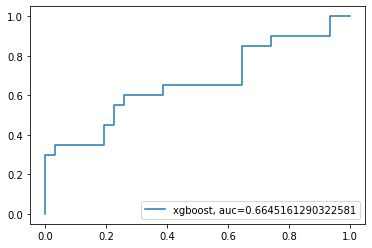

In [239]:
y_pred_proba = pipeline1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistique

In [241]:
Classifier2 = LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced')

In [242]:
# get a list of models to evaluate
def get_models2():
	models = dict()
	for i in range(2, 7):
		rfe = RFE(Classifier2, n_features_to_select=i)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',Classifier2)])
	return models

In [243]:
# get the models to evaluate
models2 = get_models2()
# evaluate the models and store results
results, names = list(), list()
for name, model in models2.items():
  model.fit(X_app, Y_app)
  preds = model.predict(X_test)
  score = MCC(Y_test, preds)
  results.append(score)
  names.append(name)
  print('- %s :  %.3f' % (name,score))

- 2 :  0.355
- 3 :  0.389
- 4 :  0.389
- 5 :  0.389
- 6 :  0.389


In [244]:
# create pipeline
rfe2 = RFE(estimator=Classifier2, n_features_to_select=3)
pipeline2 = Pipeline(steps=[('s',rfe2),('m',Classifier2)])
# fit the model 
pipeline2.fit(X_app, Y_app)

Pipeline(steps=[('s',
                 RFE(estimator=LogisticRegression(class_weight='balanced'),
                     n_features_to_select=3)),
                ('m', LogisticRegression(class_weight='balanced'))])

In [245]:
pipeline2["s"].support_

array([False, False,  True, False,  True,  True])

In [246]:
preds2 = pipeline2.predict(X_test)

In [247]:
preds2

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1])

In [248]:
cf_matrix = confusion_matrix(Y_test, preds2)
print(cf_matrix)

[[23  8]
 [ 7 13]]


In [249]:
MCC(Y_test, preds2)

0.38881244219722866

In [250]:
recall(Y_test, preds2)

0.65

In [251]:
sensibilite(Y_test, preds2)

0.65

In [252]:
specifite(Y_test, preds2)

0.7419354838709677

In [253]:
présicion_négative(Y_test, preds2)

0.7666666666666667

In [254]:
présicion_positive(Y_test, preds2)

0.6190476190476191

In [255]:
balancedacc(Y_test, preds2)

0.6928571428571428

In [256]:
kappa(Y_test, preds2)

0.38848920863309355

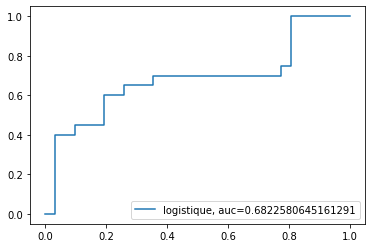

In [258]:
y_pred_proba = pipeline2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="logistique, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random_forest ?????????




In [294]:
Classifier3 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3 ,min_samples_split=3)

In [295]:
# get a list of models to evaluate
def get_models3():
	models = dict()
	for i in range(2, 7):
		rfe = RFE(Classifier3, n_features_to_select=i)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',Classifier3)])
	return models

In [309]:
# get the models to evaluate
models3 = get_models3()
# evaluate the models and store results
results, names = list(), list()
for name, model in models3.items():
  model.fit(X_app, Y_app)
  preds = model.predict(X_test)
  score = MCC(Y_test, preds)
  results.append(score)
  names.append(name)
  print('- %s :  %.3f' % (name,score))

- 2 :  0.355
- 3 :  0.273
- 4 :  0.307
- 5 :  0.260
- 6 :  0.226


In [310]:
# create pipeline
rfe3 = RFE(estimator=Classifier3, n_features_to_select=2)
pipeline3 = Pipeline(steps=[('s',rfe3),('m',Classifier3)])
# fit the model 
pipeline3.fit(X_app, Y_app)

Pipeline(steps=[('s',
                 RFE(estimator=RandomForestClassifier(max_depth=3,
                                                      min_samples_split=3),
                     n_features_to_select=2)),
                ('m',
                 RandomForestClassifier(max_depth=3, min_samples_split=3))])

In [311]:
pipeline3["s"].support_

array([ True, False,  True, False, False, False])

In [312]:
preds3 = pipeline3.predict(X_test)

In [318]:
preds3

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0])

In [319]:
cf_matrix = confusion_matrix(Y_test, preds3)
print(cf_matrix)

[[22  9]
 [ 8 12]]


In [320]:
MCC(Y_test, preds3)

0.30720983087188436

In [321]:
recall(Y_test, preds3)

0.6

In [322]:
sensibilite(Y_test, preds3)

0.6

In [323]:
specifite(Y_test, preds3)

0.7096774193548387

In [324]:
présicion_négative(Y_test, preds3)

0.7333333333333333

In [325]:
présicion_positive(Y_test, preds3)

0.5714285714285714

In [326]:
balancedacc(Y_test, preds3)

0.6523809523809523

In [327]:
kappa(Y_test, preds3)

0.3069544364508394

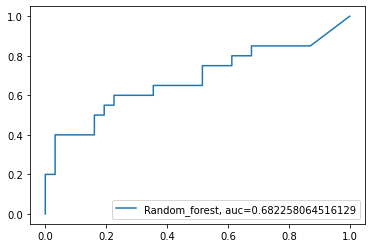

In [328]:
y_pred_proba = pipeline3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Random_forest, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Gradient_boosting




In [329]:
Classifier4 = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 )

In [330]:
# get a list of models to evaluate
def get_models4():
	models = dict()
	for i in range(2, 7):
		rfe = RFE(Classifier4, n_features_to_select=i)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',Classifier4)])
	return models

In [331]:
# get the models to evaluate
models4 = get_models4()
# evaluate the models and store results
results, names = list(), list()
for name, model in models4.items():
  model.fit(X_app, Y_app)
  preds = model.predict(X_test)
  score = MCC(Y_test, preds)
  results.append(score)
  names.append(name)
  print('- %s :  %.3f' % (name,score))

- 2 :  0.295
- 3 :  0.226
- 4 :  0.307
- 5 :  0.295
- 6 :  0.295


In [333]:
# create pipeline
rfe4 = RFE(estimator=Classifier4, n_features_to_select=4)
pipeline4 = Pipeline(steps=[('s',rfe4),('m',Classifier4)])
# fit the model 
pipeline4.fit(X_app, Y_app)

Pipeline(steps=[('s',
                 RFE(estimator=GradientBoostingClassifier(max_depth=2,
                                                          max_features=2,
                                                          min_samples_leaf=2,
                                                          n_estimators=225,
                                                          random_state=0,
                                                          subsample=1),
                     n_features_to_select=4)),
                ('m',
                 GradientBoostingClassifier(max_depth=2, max_features=2,
                                            min_samples_leaf=2,
                                            n_estimators=225, random_state=0,
                                            subsample=1))])

In [334]:
pipeline4["s"].support_

array([ True, False,  True, False,  True,  True])

In [335]:
preds4 = pipeline4.predict(X_test)

In [336]:
preds4

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0])

In [337]:
cf_matrix = confusion_matrix(Y_test, preds4)
print(cf_matrix)

[[22  9]
 [ 8 12]]


In [338]:
MCC(Y_test, preds4)

0.30720983087188436

In [339]:
recall(Y_test, preds4)

0.6

In [340]:
sensibilite(Y_test, preds4)

0.6

In [341]:
specifite(Y_test, preds4)

0.7096774193548387

In [342]:
présicion_négative(Y_test, preds4)

0.7333333333333333

In [343]:
présicion_positive(Y_test, preds4)

0.5714285714285714

In [344]:
balancedacc(Y_test, preds4)

0.6523809523809523

In [345]:
kappa(Y_test, preds4)

0.3069544364508394

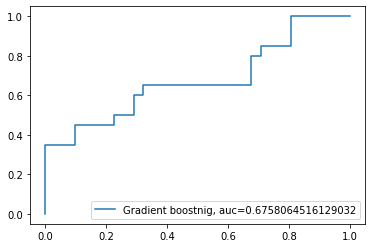

In [346]:
y_pred_proba = pipeline4.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Gradient boostnig, auc="+str(auc))
plt.legend(loc=4)
plt.show()